# Model 1 Fine Tuning
- Transfer learning with InceptionResNetV2

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Load the processed dataset from Model1_TL

In [3]:
# load numpy array from npy file
from numpy import load

X_train_std = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/X_train_std1.npy")
X_test_std = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/X_test_std1.npy")

y_train = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/y_train1.npy")
y_test = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/y_test1.npy")


In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (809, 299, 299, 3)
X_test_std_shape: (270, 299, 299, 3)


## Load the model from Model1_TL
- We apply fine tuning on this model

In [5]:
# Load the saved best model

model1_FT = keras.models.load_model("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/Model1_TL.h5")
model1_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

## Set first 25% layers as untrainable and rest as trainable

In [6]:
total_layers = len(model1_FT.layers)
freeze_layer = round(total_layers * 0.25)

for layer in model1_FT.layers[:freeze_layer]:
  layer.trainable = False

for layer in model1_FT.layers[freeze_layer:]:
  layer.trainable = True


## Compile, fit and evaluate the model
- Save the best weights while training

In [9]:
model1_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks1_FT = [
             keras.callbacks.ModelCheckpoint("bestFT1.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history1_FT = model1_FT.fit(x = X_train_std, y = y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks1_FT)

Epoch 1/10
46/46 [==============================] - 99s 695ms/step - loss: 0.0645 - accuracy: 0.9931 - val_loss: 7.8461 - val_accuracy: 0.3086
Epoch 2/10
46/46 [==============================] - 22s 469ms/step - loss: 0.0712 - accuracy: 0.9835 - val_loss: 1653.3947 - val_accuracy: 0.3086
Epoch 3/10
46/46 [==============================] - 23s 501ms/step - loss: 0.0101 - accuracy: 0.9986 - val_loss: 49.8743 - val_accuracy: 0.7407
Epoch 4/10
46/46 [==============================] - 21s 461ms/step - loss: 0.0322 - accuracy: 0.9973 - val_loss: 32.9503 - val_accuracy: 0.6420
Epoch 5/10
46/46 [==============================] - 22s 472ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 9.6295 - val_accuracy: 0.6420
Epoch 6/10
46/46 [==============================] - 23s 502ms/step - loss: 0.0878 - accuracy: 0.9890 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 7/10
46/46 [==============================] - 22s 470ms/step - loss: 0.0369 - accuracy: 0.9931 - val_loss: 0.4352 - val_accuracy: 0

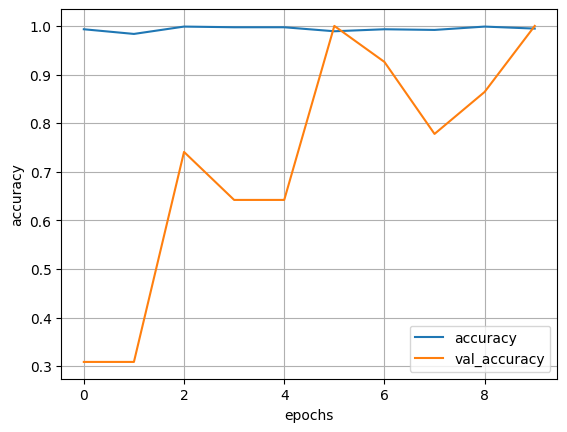

In [10]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history1_FT.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [11]:
testLoss_FT, testAccuracy_FT = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 [==============================] - 12s 753ms/step - loss: 0.0095 - accuracy: 1.0000
Test-loss: 0.009507, Test-accuracy: 1.000000


In [12]:
# Plugging best weights to the model to evaluate

model1_FT.load_weights("bestFT1.h5")

testLoss_FT, testAccuracy_FT = model1_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FT, testAccuracy_FT))

9/9 [==============================] - 3s 313ms/step - loss: 0.0062 - accuracy: 1.0000
Test-loss: 0.006180, Test-accuracy: 1.000000


## Prediction of testing sample and inferences

In [13]:
y_proba = model1_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

9/9 [==============================] - 8s 325ms/step
[4 3 1 3 0 4 1 4 1 4 0 4 1 1 4 4 0 2 2 3 3 3 1 2 0 0 4 3 1 4 3 2 0 1 1 1 3
 3 1 0 0 0 1 0 0 3 1 1 4 3 0 2 3 2 2 3 4 2 1 0 3 3 0 2 0 0 3 2 4 3 3 2 4 2
 3 3 1 2 4 4 2 3 0 1 4 1 1 2 2 2 2 0 0 2 4 1 3 2 1 0 2 3 3 3 4 2 4 4 1 3 0
 2 4 3 1 0 3 2 1 0 1 3 1 1 1 0 2 2 1 0 4 2 2 2 1 1 1 2 0 2 1 1 1 4 3 0 0 2
 0 2 3 0 0 1 1 4 2 0 2 3 4 3 2 3 0 0 1 0 1 1 2 4 2 1 4 3 2 3 4 0 0 3 2 3 4
 0 3 2 3 4 3 0 3 3 0 2 0 3 3 0 3 2 1 1 3 0 2 4 0 0 4 0 3 4 1 2 2 3 1 2 3 4
 2 0 0 2 0 4 4 4 3 2 1 2 4 3 4 1 1 4 3 3 0 0 2 0 1 1 1 4 1 3 1 4 2 3 0 2 4
 2 1 0 2 4 2 1 4 0 1 0]


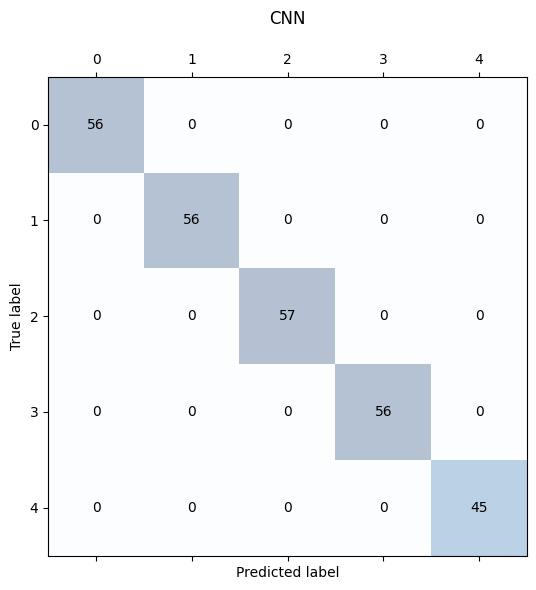

In [14]:
# Confusion matrix of testing data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [15]:
# Calculating the precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  1.0
Recall:  1.0
F1-score:  1.0


## Save the final Fine-Tuned model

In [16]:
# Saves the best model obtained
model1_FT.save("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/Model1_FT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
